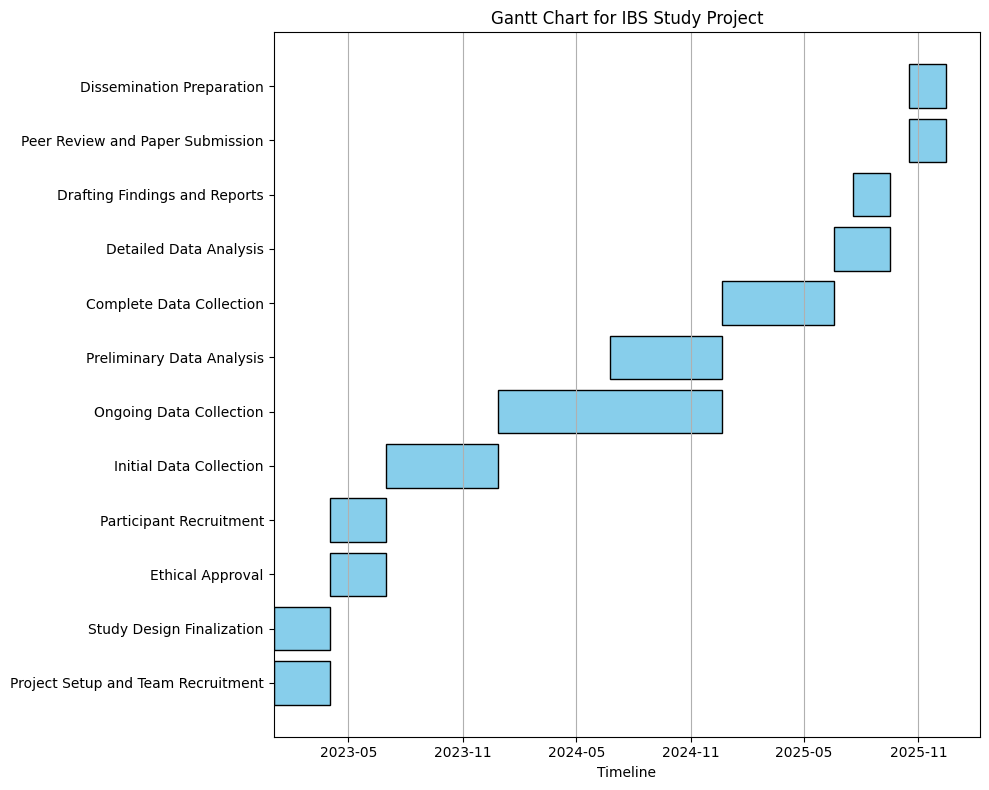

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime

# Define the project start date
start_date = datetime(2023, 1, 1)

# Define the tasks and their start and end months relative to the project start date
tasks = {
    "Project Setup and Team Recruitment": [0, 3],
    "Study Design Finalization": [0, 3],
    "Ethical Approval": [3, 6],
    "Participant Recruitment": [3, 6],
    "Initial Data Collection": [6, 12],
    "Ongoing Data Collection": [12, 24],
    "Preliminary Data Analysis": [18, 24],
    "Complete Data Collection": [24, 30],
    "Detailed Data Analysis": [30, 33],
    "Drafting Findings and Reports": [31, 33],
    "Peer Review and Paper Submission": [34, 36],
    "Dissemination Preparation": [34, 36]
}

# Create a DataFrame
df = pd.DataFrame.from_dict(tasks, orient="index", columns=["Start Month", "End Month"])

# Calculate start and end dates
df['Start Date'] = df['Start Month'].apply(lambda x: mdates.num2date(mdates.datestr2num(start_date.strftime('%Y-%m-%d')) + x*30))
df['End Date'] = df['End Month'].apply(lambda x: mdates.num2date(mdates.datestr2num(start_date.strftime('%Y-%m-%d')) + x*30))

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
labels = []
for i, task in enumerate(df.index):
    labels.append(task)
    start = df.loc[task, 'Start Date']
    end = df.loc[task, 'End Date']
    ax.barh(i, end - start, left=start, color='skyblue', edgecolor='k')
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel('Timeline')
ax.set_title('Gantt Chart for IBS Study Project')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.grid(axis='x')
plt.tight_layout()

plt.show()
